In [ ]:
# check if this instance of the notebook already has files present
# and thus determine which steps required prior to reading in file and handling the data
!ls

sample_data


In [ ]:
!pip install pyspark
#nstall findspark if not already installed
!pip3 install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=adc7989907774ccbee0b0538484e166948b7207713b8ea9f8e88f62176d581a2
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import os
import findspark

In [ ]:
# set-up spark (NB if Apache amend versions on download site we will need to amend path in wget command)
print("\nWelcome to advanced top sites")
!ls
!rm -f spark-3.4.[01]-bin-hadoop3.tgz*
!rm -rf spark-3.4.[01]-bin-hadoop3
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz
!tar -xf spark-3.4.3-bin-hadoop3.tgz
!ls -alt


Welcome to advanced top sites
sample_data
--2024-06-13 16:53:53--  https://downloads.apache.org/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f8:10a:39da::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388930980 (371M) [application/x-gzip]
Saving to: ‘spark-3.4.3-bin-hadoop3.tgz’

spark-3.4.3-bin-had 100%[===================>] 370.91M  26.9MB/s    in 14s     

2024-06-13 16:54:08 (26.1 MB/s) - ‘spark-3.4.3-bin-hadoop3.tgz’ saved [388930980/388930980]

total 379836
drwxr-xr-x  1 root root      4096 Jun 13 16:54 .
drwxr-xr-x  1 root root      4096 Jun 13 16:51 ..
drwxr-xr-x  1 root root      4096 Jun 12 18:22 sample_data
drwxr-xr-x  4 root root      4096 Jun 12 18:21 .config
-rw-r--r--  1 root root 388930980 Apr 15 01:30 spark-3.4.3-bin-hadoop3.tgz
drwxr-xr-x 13 1000 1000      4096 Apr 15 

In [ ]:
# init spark (ensure SPARK_HOME set to same version as we download earlier)
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.3-bin-hadoop3"
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
#sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
SparkSession.builder.getOrCreate()
##

In [ ]:
spark = SparkSession.builder.appName("bikes").getOrCreate()

In [ ]:
# get file for given year from TfL open data
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2024-06-13 16:54:31--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.98.104, 104.16.97.104
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.98.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M  15.3MB/s    in 15s     

2024-06-13 16:54:46 (14.3 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  

In [ ]:
file1 = "./1. Journey*csv"  # 05 Jan to 02 Feb
file2 = "./2. Journey*csv"  # 03 Feb to 01 Mar
file3 = "./3. Journey*csv"  # 02 Mar to 31 Mar
file4 = "./4. Journey*csv"  # 01 Apr to 26 Apr
file5 = "./5. Journey*csv"  # 27 Apr to 24 May
file6 = "./6. Journey*csv"  # 25 May - 21 Jun
file7 = "./7. Journey*csv"  # 22 Jun to 19 Jul
file8a = "./8a Journey*csv"  # 20 Jul to 31 Jul
file8b = "./8b Journey*csv"  # 1 Aug to 16 Aug
#file9a = "./9a Journey*csv"  # 17 Aug to 31 Aug
file9b = "./9b Journey*csv"  # 01 Sep to 13 Sep
file10a = "./10a. Journey*csv"  # 14 Sep to 27 Sep
#file10b = "./10b. Journey*csv"  # 28 Sep to 11 Oct
file11a = "./11a. Journey*csv"  # 12 Oct to 08 Nov
file11b = "./11b. Journey*csv"  # 12 Oct to 08 Nov
file12a = "./12a. Journey*csv"  # 09 Nov to 06 Dec
file12b = "./12b. Journey*csv"  # 09 Nov to 06 Dec
file13a = "./13a. Journey*csv"  # 07 Dec to 21 Dec
#file13b = "./13b. Journey*csv"  # 22 Dec to 3rd Jan
file14 = "./14. Journey*csv"  # 08 Dec to 04 Jan (so this is the earliest file, carries on to file 1)

# Combine non-erronous file paths into a list
all_files = [file1, file2, file3, file4, file5,
             file6, file7, file8a, file8b, file9b,
             file10a, file11a, file11b,
             file12a, file12b, file13a, file14]

# Load these files into a single DataFrame
combined_df = spark.read.format("csv") \
                        .option("header", "true") \
                        .option("inferSchema", "true") \
                        .load(all_files)

# Show top 10 rows of the combined DataFrame
combined_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|
| 34724273|    1260|   7904|06/07/2014 16:35|          695|Islington Green, ...|06/07/2014 16:14|            311|Foley Street, Fit...|
| 34956750|    1500|   8251|13/07/2014 00:41|          

In [ ]:
combined_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [ ]:
# Count the number of null values in each column
missing_values = combined_df.select([col(c).isNull().cast("int").alias(c) for c in combined_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|          111|            111|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
from pyspark.sql.types import StructType, StructField, StringType

In [ ]:
#define a schema
schema = StructType([
    StructField("Rental Id", StringType(), True),
    StructField("Duration", StringType(), True),
    StructField("Bike Id", StringType(), True),
    StructField("End Date", StringType(), True),
    StructField("EndStation Id", StringType(), True),
    StructField("EndStation Name", StringType(), True),
    StructField("Start Date", StringType(), True),
    StructField("StartStation Id", StringType(), True),
    StructField("StartStation Name", StringType(), True)
])

# Load AugA_df with the specified schema
AugA_df = spark.read.format("csv") \
                    .option("header", "true") \
                    .schema(schema) \
                    .load('./9a*csv')

In [ ]:
AugA_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 36389367|     300|   4107|17/08/2014 00:05|          206|New Road 1 , Whit...|17/08/2014 00:00|            444|Bethnal Green Gar...|
| 36389361|    1140|   3763|17/08/2014 00:19|          186|South Wharf Road,...|17/08/2014 00:00|            713|Hawley Crescent, ...|
| 36389355|     120|   2284|17/08/2014 00:02|          432|Exhibition Road M...|17/08/2014 00:00|            428|Exhibition Road, ...|
| 36389352|     360|    446|17/08/2014 00:06|          433|Wren Street, Holborn|17/08/2014 00:00|            436|Red Lion Street, ...|
| 36389372|     240|   7835|17/08/2014 00:04|          

In [ ]:
row_count = AugA_df.count()
print("Number of rows in AugA_df:", row_count)

Number of rows in AugA_df: 902300


In [ ]:
AugA_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [ ]:
# Count the number of null values in each column
missing_values = AugA_df.select([col(c).isNull().cast("int").alias(c) for c in AugA_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|   452136|  452136| 452136|  452136|       452144|         452144|    452136|         452136|           452136|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
combined_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [ ]:
AugA1_df = AugA_df.filter(col("Rental Id").isNotNull())

#removes all instances where all shared columns are null
#filtered_df1.show(10)

In [ ]:
row_count = AugA1_df.count()
print("Number of rows in AugA_df:", row_count)
#this is the number in the excel workbook - ready to join

Number of rows in AugA_df: 450164


In [ ]:
# Count the number of null values in each column
missing_values = AugA1_df.select([col(c).isNull().cast("int").alias(c) for c in AugA1_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            8|              8|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
from pyspark.sql.functions import col

# Select only the shared columns between individual df and combined_df
shared_columns = list(set(AugA1_df.columns) & set(combined_df.columns))

# Union the DataFrames on the shared columns
meld_df = AugA1_df.select(*shared_columns).union(combined_df.select(*shared_columns))

In [ ]:
meld_df.printSchema()

root
 |-- StartStation Id: string (nullable = true)
 |-- Rental Id: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)



In [ ]:
# Count the number of null values in each column
missing_values = meld_df.select([col(c).isNull().cast("int").alias(c) for c in meld_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()
#confirmed, union was performed correctly with no issues

+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|Start Date|End Date|EndStation Id|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|              0|        0|      0|                0|       0|            119|         0|       0|          119|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+



In [ ]:
Sepb_df = spark.read.format("csv") \
                    .option("header", "true") \
                    .schema(schema) \
                    .load('./10b.*csv')  # 25May to 21Jun

In [ ]:
#Sepb_df = spark.read.format("csv") \
                      #  .option("header", "true") \
                       # .option("inferSchema", "true") \
                       # .load('./10b.*csv)

In [ ]:
Sepb_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [ ]:
row_count = Sepb_df.count()
print("Number of rows in Sepb_df:", row_count)

Number of rows in Sepb_df: 919009


In [ ]:
# Count the number of null values in each column
missing_values = Sepb_df.select([col(c).isNull().cast("int").alias(c) for c in Sepb_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|   488627|  488627| 488627|  488627|       488636|         488636|    488627|         488627|           488627|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
Sepb_df = Sepb_df.filter(col("Rental Id").isNotNull())
#same steps as detailed previously, removval of null values when shared across all columns

In [ ]:
row_count = Sepb_df.count()
print("Number of rows in Sepb_df:", row_count)
#confirmed, the same as expected

Number of rows in Sepb_df: 430382


In [ ]:
# Count the number of null values in each column
missing_values = Sepb_df.select([col(c).isNull().cast("int").alias(c) for c in Sepb_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            9|              9|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
#three new columns for this file, lets check if they store any unique values
Sepb_df[["_c9", "_c10", "_c11"]].distinct().show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `_c9` cannot be resolved. Did you mean one of the following? [`Duration`, `Bike Id`, `End Date`, `Rental Id`, `Start Date`].;
'Project ['_c9, '_c10, '_c11]
+- Filter isnotnull(Rental Id#765)
   +- Relation [Rental Id#765,Duration#766,Bike Id#767,End Date#768,EndStation Id#769,EndStation Name#770,Start Date#771,StartStation Id#772,StartStation Name#773] csv


In [ ]:
#they didnt so we will drop them
columns_to_drop = ["_c9", "_c10", "_c11"]

In [ ]:
Sepb_df1 = Sepb_df.drop(*columns_to_drop)

In [ ]:
Sepb_df1 = Sepb_df

In [ ]:

# Select only the shared columns between Sepb_df1 and combined_df
shared_columns = list(set(Sepb_df1.columns) & set(meld_df.columns))

# Union the DataFrames on the shared columns
meld_df1 = Sepb_df1.select(*shared_columns).union(meld_df.select(*shared_columns))

In [ ]:
meld_df1.printSchema()

root
 |-- StartStation Id: string (nullable = true)
 |-- Rental Id: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)



In [ ]:
# Count the number of null values in each column
missing_values = meld_df1.select([col(c).isNull().cast("int").alias(c) for c in meld_df1.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()
#confirmation of union with no issues

+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|Start Date|End Date|EndStation Id|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|              0|        0|      0|                0|       0|            128|         0|       0|          128|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+



In [ ]:
Decb_df = (spark.read.format("csv") \
         .option("header", "true") \
         .schema(schema)) \
         .load('./13b.*csv')  # 25May to 21Jun

In [ ]:
Decb_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [ ]:
row_count = Decb_df.count()
print("Number of rows in Decb_df:", row_count)

Number of rows in Decb_df: 472735


In [ ]:
# Count the number of null values in each column
missing_values = Decb_df.select([col(c).isNull().cast("int").alias(c) for c in Decb_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|   298350|  298350| 298350|  298350|       298354|         298354|    298350|         298350|           298350|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
Decb_df1 = Decb_df.filter(col("Rental Id").isNotNull())

#removes all instances where null is the case for all columns

In [ ]:
row_count = Decb_df1.count()
print("Number of rows in Decb_df:", row_count)
#confirmed, the same as expected

Number of rows in Decb_df: 174385


In [ ]:
# Count the number of null values in each column
missing_values = Decb_df1.select([col(c).isNull().cast("int").alias(c) for c in Decb_df1.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            4|              4|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:

# Select only the shared columns between Sepb_df and combined_df
shared_columns = list(set(Decb_df1.columns) & set(meld_df1.columns))

# Union the DataFrames on the shared columns
meld_df2 = Decb_df1.select(*shared_columns).union(meld_df1.select(*shared_columns))

In [ ]:
# Count the number of null values in each column
missing_values = meld_df2.select([col(c).isNull().cast("int").alias(c) for c in meld_df2.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()
#confirmed, no issues

+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|Start Date|End Date|EndStation Id|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|              0|        0|      0|                0|       0|            132|         0|       0|          132|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+



In [ ]:
combined_df = meld_df2

In [ ]:

# show top 10 - if this gives an error you need to check the previous step/s
combined_df.show(10)
print("duration is SECONDS")
# see how many entries (rows) in data
numRows = combined_df.count()
print("there are ",numRows," rows")

# get "list" of last 2 rows
combined_df.tail(2)
# we can deduce there is no inherent ordering of the rows

+---------------+---------+-------+--------------------+--------+--------------------+----------------+----------------+-------------+
|StartStation Id|Rental Id|Bike Id|   StartStation Name|Duration|     EndStation Name|      Start Date|        End Date|EndStation Id|
+---------------+---------+-------+--------------------+--------+--------------------+----------------+----------------+-------------+
|            443| 40154802|  12760|Philpot Street, W...|     120|Jubilee Street, S...|22/12/2014 00:01|22/12/2014 00:03|          450|
|            160| 40154801|  10507|Waterloo Place, S...|     660|Regency Street, W...|22/12/2014 00:01|22/12/2014 00:12|          267|
|            225| 40154803|   2030|Notting Hill Gate...|     180|Turquoise Island,...|22/12/2014 00:01|22/12/2014 00:04|          379|
|            206| 40154807|  11419|New Road 1 , Whit...|     420|Wapping Lane, Wap...|22/12/2014 00:02|22/12/2014 00:09|          458|
|            516| 40154804|   4545|Chrisp Street Mar...

[Row(StartStation Id='23', Rental Id='40154799', Bike Id='11517', StartStation Name='Red Lion Square, Holborn', Duration='3000', EndStation Name='Shadwell Station, Shadwell', Start Date='21/12/2014 23:58', End Date='22/12/2014 00:48', EndStation Id='449'),
 Row(StartStation Id='377', Rental Id='40154800', Bike Id='7985', StartStation Name='Waterloo Bridge, South Bank', Duration='1140', EndStation Name='Great Russell Street, Bloomsbury', Start Date='21/12/2014 23:59', End Date='22/12/2014 00:18', EndStation Id='15')]

In [ ]:
combined_df = combined_df.withColumn("Duration", col("Duration").cast("int"))

In [ ]:
# Count the number of null values in each column
missing_values = combined_df.select([col(c).isNull().cast("int").alias(c) for c in combined_df.columns])

# Calculate the total number of missing values in each column
missing_values_count = missing_values.agg(*[sum(col(c)).alias(c) for c in missing_values.columns])

# Show the total number of missing values in each column
missing_values_count.show()

+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|Start Date|End Date|EndStation Id|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|              0|        0|      0|                0|       0|            132|         0|       0|          132|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+



In [ ]:
filtered_df1 = combined_df.filter(col("Endstation Id").isNotNull())

# Show a sample of the filtered DataFrame
filtered_df1.show(10)

+---------------+---------+-------+--------------------+--------+--------------------+----------------+----------------+-------------+
|StartStation Id|Rental Id|Bike Id|   StartStation Name|Duration|     EndStation Name|      Start Date|        End Date|EndStation Id|
+---------------+---------+-------+--------------------+--------+--------------------+----------------+----------------+-------------+
|            443| 40154802|  12760|Philpot Street, W...|     120|Jubilee Street, S...|22/12/2014 00:01|22/12/2014 00:03|          450|
|            160| 40154801|  10507|Waterloo Place, S...|     660|Regency Street, W...|22/12/2014 00:01|22/12/2014 00:12|          267|
|            225| 40154803|   2030|Notting Hill Gate...|     180|Turquoise Island,...|22/12/2014 00:01|22/12/2014 00:04|          379|
|            206| 40154807|  11419|New Road 1 , Whit...|     420|Wapping Lane, Wap...|22/12/2014 00:02|22/12/2014 00:09|          458|
|            516| 40154804|   4545|Chrisp Street Mar...

In [ ]:
# Count the number of null values in each column
missing_values1 = filtered_df1.select([col(c).isNull().cast("int").alias(c) for c in filtered_df1.columns])

# Calculate the total number of missing values in each column
missing_values_count1 = missing_values1.agg(*[sum(col(c)).alias(c) for c in missing_values1.columns])

# Show the total number of missing values in each column
missing_values_count1.show()
#can assume missing entries without endst

+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|Start Date|End Date|EndStation Id|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+
|              0|        0|      0|                0|       0|              0|         0|       0|            0|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+



In [ ]:
from pyspark.sql import Window
from pyspark.sql import functions as F

In [ ]:
# Define a window specification
window_spec = Window.partitionBy("StartStation Name")

# Add a new column with the count of instances of each StartStation Name
filtered_df1 = filtered_df1.withColumn("NumInstances", F.count("StartStation Name").over(window_spec))

In [ ]:
# show top 10 - if this gives an error you need to check the previous step/s
filtered_df1.show(10)
print("duration is SECONDS")
# see how many entries (rows) in data
numRows = filtered_df1.count()
print("there are ",numRows," rows")

# get "list" of last 2 rows
filtered_df1.tail(2)
# we can deduce there is no inherent ordering of the rows

+---------------+---------+-------+--------------------+--------+--------------------+----------------+----------------+-------------+------------+
|StartStation Id|Rental Id|Bike Id|   StartStation Name|Duration|     EndStation Name|      Start Date|        End Date|EndStation Id|NumInstances|
+---------------+---------+-------+--------------------+--------+--------------------+----------------+----------------+-------------+------------+
|            606| 40155034|  11527|Addison Road, Hol...|    2280|Cadogan Gardens, ...|22/12/2014 00:56|22/12/2014 01:34|          395|        3831|
|            606| 40157852|   4659|Addison Road, Hol...|    1860|Pall Mall East, W...|22/12/2014 08:38|22/12/2014 09:09|          233|        3831|
|            606| 40158348|    588|Addison Road, Hol...|     660|Imperial College,...|22/12/2014 08:50|22/12/2014 09:01|          392|        3831|
|            606| 40159626|   3578|Addison Road, Hol...|    1620|Wellington Arch, ...|22/12/2014 09:41|22/12/201

[Row(StartStation Id='466', Rental Id='40151582', Bike Id='1788', StartStation Name='Whiston Road, Haggerston', Duration=960, EndStation Name='Liverpool Road (N1 Centre), Angel', Start Date='21/12/2014 17:06', End Date='21/12/2014 17:22', EndStation Id='234', NumInstances=7196),
 Row(StartStation Id='466', Rental Id='40152339', Bike Id='9681', StartStation Name='Whiston Road, Haggerston', Duration=360, EndStation Name='Bethnal Green Road, Shoreditch', Start Date='21/12/2014 18:07', End Date='21/12/2014 18:13', EndStation Id='132', NumInstances=7196)]

In [ ]:
# so vast majority of rides in this month have "Duration" under 2 hours
#1.2% over 7200 seconds
total = filtered_df1.count()
numExceed = filtered_df1.filter("Duration > 7200").count()
print("Of all rides, percentage over 2 hours:", (numExceed*100)/total)

Of all rides, percentage over 2 hours: 1.2153362055254697


In [ ]:
filtered_df1 = filtered_df1.filter((col("Duration") >= 1) & (col("Duration") <= 7200)) #only include instances where ride duration was longer than 1second, shorter than 2hours

In [ ]:
smallest_duration = filtered_df1.agg(F.min("Duration")).collect()[0][0]

In [ ]:
smallest_duration

60

In [ ]:
# see how many entries (rows) in data
numRows = filtered_df1.count()
print("there are ",numRows," rows") #how many rows are remaining once filtered to only include rides with duration betweeen 60 and 7200 seconds

there are  10085370  rows


In [ ]:
filtered_durations = filtered_df1.select("duration").rdd.flatMap(lambda x: x).collect() #extract all of the values from the duration column into a list
filtered_durations = np.array(filtered_durations) #convert duration values into numpy array

In [ ]:
print("Number of elements in filtered_durations:", len(filtered_durations)) #observe the number of duration values. they should match the number of rows provided in the cell above

Number of elements in filtered_durations: 10085370


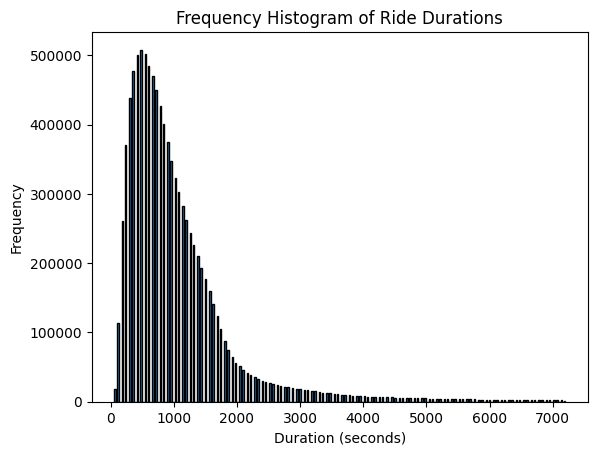

In [ ]:
import matplotlib.pyplot as plt


# Plot histogram
plt.hist(filtered_durations, bins=300, edgecolor='black')

# Add labels and title
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Ride Durations')

# Show plot
plt.show()

In [ ]:
# Count the number of null values in each column
missing_values1 = filtered_df1.select([col(c).isNull().cast("int").alias(c) for c in filtered_df1.columns])

# Calculate the total number of missing values in each column
missing_values_count1 = missing_values1.agg(*[sum(col(c)).alias(c) for c in missing_values1.columns])

# Show the total number of missing values in each column
missing_values_count1.show()
#can assume missing entries without endst

+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+------------+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|Start Date|End Date|EndStation Id|NumInstances|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+------------+
|              0|        0|      0|                0|       0|              0|         0|       0|            0|           0|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+------------+



In [ ]:
filtered_df1_with_timestamp = filtered_df1.withColumn(
    "start",
    to_timestamp(col("Start Date"), format="dd/MM/yyyy HH:mm")
)

In [ ]:
# Filter for dates in 2014
filtered_df1 = filtered_df1_with_timestamp.filter(
    (filtered_df1_with_timestamp.start >= "2014-01-01 00:00:00") &
    (filtered_df1_with_timestamp.start < "2015-01-01 00:00:00")
)

In [ ]:
# Count the number of null values in each column
missing_values1 = filtered_df1.select([col(c).isNull().cast("int").alias(c) for c in filtered_df1.columns])

# Calculate the total number of missing values in each column
missing_values_count1 = missing_values1.agg(*[sum(col(c)).alias(c) for c in missing_values1.columns])

# Show the total number of missing values in each column
missing_values_count1.show()


+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+------------+-----+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|Start Date|End Date|EndStation Id|NumInstances|start|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+------------+-----+
|              0|        0|      0|                0|       0|              0|         0|       0|            0|           0|    0|
+---------------+---------+-------+-----------------+--------+---------------+----------+--------+-------------+------------+-----+



In [ ]:
filtered_df1 = filtered_df1.drop("Start Date")#remove orignial column start date

In [ ]:
filtered_df1.filter(filtered_df1.start < "2014-06-01 00:00:00").show(5)#test to see if date filter worked

+---------------+---------+-------+--------------------+--------+--------------------+----------------+-------------+------------+-------------------+
|StartStation Id|Rental Id|Bike Id|   StartStation Name|Duration|     EndStation Name|        End Date|EndStation Id|NumInstances|              start|
+---------------+---------+-------+--------------------+--------+--------------------+----------------+-------------+------------+-------------------+
|            606| 33219827|  10892|Addison Road, Hol...|     480|Notting Hill Gate...|25/05/2014 15:01|          225|        3831|2014-05-25 14:53:00|
|            606| 33318865|   3963|Addison Road, Hol...|     420|Notting Hill Gate...|29/05/2014 20:05|          225|        3831|2014-05-29 19:58:00|
|            606| 33367150|  12565|Addison Road, Hol...|     420|Notting Hill Gate...|31/05/2014 12:51|          225|        3831|2014-05-31 12:44:00|
|            606| 33224772|  11082|Addison Road, Hol...|     960|Old Quebec Street...|25/05/20

In [ ]:
filtered_df1.filter(filtered_df1.start < "2014-01-01 00:00:00").show(5)#test to see if date filter worked

+---------------+---------+-------+-----------------+--------+---------------+--------+-------------+------------+-----+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|End Date|EndStation Id|NumInstances|start|
+---------------+---------+-------+-----------------+--------+---------------+--------+-------------+------------+-----+
+---------------+---------+-------+-----------------+--------+---------------+--------+-------------+------------+-----+



In [ ]:
filtered_df1.filter(filtered_df1.start > "2015-01-01 00:00:00").show(5) #test to see if date filter worked

+---------------+---------+-------+-----------------+--------+---------------+--------+-------------+------------+-----+
|StartStation Id|Rental Id|Bike Id|StartStation Name|Duration|EndStation Name|End Date|EndStation Id|NumInstances|start|
+---------------+---------+-------+-----------------+--------+---------------+--------+-------------+------------+-----+
+---------------+---------+-------+-----------------+--------+---------------+--------+-------------+------------+-----+



In [ ]:
from pyspark.sql.functions import collect_list

In [ ]:
from pyspark.sql.functions import col, sum, mean, min, max, stddev, expr,  count

In [ ]:
agg_expr = {
    "Duration": [
        F.sum("Duration").alias("Total Duration"),
        F.mean("Duration").alias("Mean Duration"),
        F.min("Duration").alias("Shortest Ride"),
        F.max("Duration").alias("Longest Ride"),
        F.expr("percentile_approx(Duration, 0.5)").alias("Median"),
        F.stddev("Duration").alias("Standard Deviation")
        #F.count("Duration").alias("Number of Rides")

    ]
}

In [ ]:
#apply windows function to obtain stats for dataframe
start_df = (filtered_df1
           .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "NumInstances", "Duration")
            .groupBy("StartStation Id", "StartStation Name", "NumInstances")
            .agg(*[expr for expr in agg_expr["Duration"]])
            .orderBy(F.col("Total Duration").desc()))

start_df.show(10, truncate=False)

+---------------+-----------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|StartStation Id|StartStation Name                  |NumInstances|Total Duration|Mean Duration     |Shortest Ride|Longest Ride|Median|Standard Deviation|
+---------------+-----------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|191            |Hyde Park Corner, Hyde Park        |102715      |201840600     |2114.0896998135618|60           |7200        |1620  |1472.6519098142294|
|307            |Black Lion Gate, Kensington Gardens|72678       |124812180     |1837.8786941732562|120          |7200        |1440  |1422.6293401668258|
|303            |Albert Gate, Hyde Park             |70908       |123357660     |1852.4118150556365|60           |7200        |1440  |1322.1125453031923|
|406            |Speakers' Corner 2, Hyde Park      |49282       |94882500  

In [ ]:
start_df_ordered = start_df.orderBy(F.col("NumInstances"))

# Select the bottom 50 stations
bottom_50_df = start_df_ordered.limit(50)

# Show the bottom 50 stations
bottom_50_df.show(50, truncate=False)

+---------------+----------------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|StartStation Id|StartStation Name                             |NumInstances|Total Duration|Mean Duration     |Shortest Ride|Longest Ride|Median|Standard Deviation|
+---------------+----------------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|198            |tabletop1                                     |3           |1500          |750.0             |540          |960         |540   |296.98484809834997|
|241            |Contact Centre, Southbury House               |12          |8820          |1764.0            |180          |3060        |2520  |1431.600502933692 |
|778            |Pop Up Dock 1                                 |567         |674640        |1222.1739130434783|180          |7140        |1080  |800.3962168830079 |
|777      

In [ ]:
start_df_ordered = (start_df
                   .filter(F.col("NumInstances") >= 100)  # Filter out instances where NumInstances < 100
                   .orderBy(F.col("NumInstances").asc()))
# Select the bottom 50 stations
bottom_50_df = start_df_ordered.limit(50)

# Show the bottom 50 stations
bottom_50_df.show(50, truncate=False)

+---------------+----------------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|StartStation Id|StartStation Name                             |NumInstances|Total Duration|Mean Duration     |Shortest Ride|Longest Ride|Median|Standard Deviation|
+---------------+----------------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|778            |Pop Up Dock 1                                 |567         |674640        |1222.1739130434783|180          |7140        |1080  |800.3962168830079 |
|777            |Limburg Road, Clapham Common                  |715         |949800        |1382.532751091703 |60           |7020        |1260  |976.9650102303724 |
|767            |Santos Road, Wandsworth                       |754         |827400        |1134.9794238683128|120          |6120        |960   |896.3273850382172 |
|672      

In [ ]:
filtered_df1 = (filtered_df1
                   .filter(F.col("NumInstances") >= 100))  # Filter out instances where NumInstances < 100 for actual dataframe


In [ ]:
#order the df by mean duration in descending order
start_df_ordered = start_df_ordered.orderBy(F.col("Mean Duration"))
start_df_ordered = start_df_ordered.orderBy(desc("Mean Duration"))


# Show the DataFrame
start_df_ordered.show(truncate=False)

+---------------+-------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|StartStation Id|StartStation Name                    |NumInstances|Total Duration|Mean Duration     |Shortest Ride|Longest Ride|Median|Standard Deviation|
+---------------+-------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+
|191            |Hyde Park Corner, Hyde Park          |102715      |201840600     |2114.0896998135618|60           |7200        |1620  |1472.6519098142294|
|406            |Speakers' Corner 2, Hyde Park        |49282       |94882500      |2071.6250736883476|60           |7200        |1560  |1465.9306830047472|
|407            |Speakers' Corner 1, Hyde Park        |42046       |77770140      |2018.3784485219694|60           |7200        |1560  |1446.8048859570383|
|111            |Park Lane , Hyde Park                |18552    

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# Add a new column with unique IDs indicating the order of appearance, starting from 1. this will provide the rank of each startstation name with respect to duration legnth
start_df_ordered = start_df_ordered.withColumn("Rank", monotonically_increasing_id() + 1)


In [ ]:
start_df_ordered.show(truncate=False)

+---------------+-------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+----+
|StartStation Id|StartStation Name                    |NumInstances|Total Duration|Mean Duration     |Shortest Ride|Longest Ride|Median|Standard Deviation|Rank|
+---------------+-------------------------------------+------------+--------------+------------------+-------------+------------+------+------------------+----+
|191            |Hyde Park Corner, Hyde Park          |102715      |201840600     |2114.0896998135618|60           |7200        |1620  |1472.6519098142294|1   |
|406            |Speakers' Corner 2, Hyde Park        |49282       |94882500      |2071.6250736883476|60           |7200        |1560  |1465.9306830047537|2   |
|407            |Speakers' Corner 1, Hyde Park        |42046       |77770140      |2018.3784485219694|60           |7200        |1560  |1446.8048859570383|3   |
|111            |Park Lane , Hyde 

In [ ]:
baylis_roadrank = start_df_ordered.filter(col("StartStation Name") == "Baylis Road, Waterloo")
baylis_roadrank.show(truncate=False)


+---------------+---------------------+------------+--------------+-----------------+-------------+------------+------+------------------+----+
|StartStation Id|StartStation Name    |NumInstances|Total Duration|Mean Duration    |Shortest Ride|Longest Ride|Median|Standard Deviation|Rank|
+---------------+---------------------+------------+--------------+-----------------+-------------+------------+------+------------------+----+
|272            |Baylis Road, Waterloo|27270       |21324120      |815.5474815466401|60           |7200        |660   |674.2274941787757 |664 |
+---------------+---------------------+------------+--------------+-----------------+-------------+------------+------+------------------+----+



In [ ]:
import numpy as np
from scipy.stats import levene

In [ ]:
from scipy import stats

In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
baylis_road_df1 = filtered_df1.filter(F.col("StartStation Name") == "Baylis Road, Waterloo")#subset of main dataframe containing only instances where sartsation name is Baylis road

In [ ]:
row_count = baylis_road_df1.count()
print("Number of rows in baylis_road_df1:", row_count)

Number of rows in baylis_road_df1: 26147


In [ ]:
other_stations_df = filtered_df1.filter(F.col("StartStation Name") != "Baylis Road, Waterloo")#subset of main dataframe containing all instances apart from those where startstation name is baylis road

In [ ]:
row_count = other_stations_df.count()
print("Number of rows in other_stations_df:", row_count)

Number of rows in other_stations_df: 9718336


In [ ]:
duration_values = baylis_road_df1.select("duration").rdd.flatMap(lambda x: x).collect() #extract all of the values from the duration column into a list for Baylis road

In [ ]:
duration_values1 = other_stations_df.select("duration").rdd.flatMap(lambda x: x).collect() #extract all of the values from the duration column into a list for all other stations

In [ ]:
B = np.array(duration_values1)#convert duration values for all stations apart from baylis road into numpy array
A = np.array(duration_values) #convert duration values for baylis road into numpy array

In [ ]:
print(duration_values[:10]) #confirm values are in a numpy array

[60, 60, 600, 480, 1020, 660, 540, 540, 780, 1020]


In [ ]:
print("Number of rows in filtered_df1:", filtered_df1.count()) #how many instances there were in total

Number of rows in filtered_df1: 9744483


In [ ]:
print("Number of elements in Baylis road Array:", len(A)) #observe the number of duration values for Baylis Road. confirmed to correspond with number of instances present for the dataframe

Number of elements in mean_durations: 26147


In [ ]:
print("Number of elements in Other stations Array:", len(B))#observe the number of duration values for Baylis Road. confirmed to correspond with number of instances present for the dataframe, and len(B) + len(A) = filtered_df1.count therefore can continue as no data loss


Number of elements in mean_durations: 9718336


In [ ]:
from scipy.stats import levene

In [ ]:
# Perform Levene's test
statistic, p_value = levene(A, B)

# Print results
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

Levene's test statistic: 1318.6078638588183
p-value: 1.0687954252652312e-288


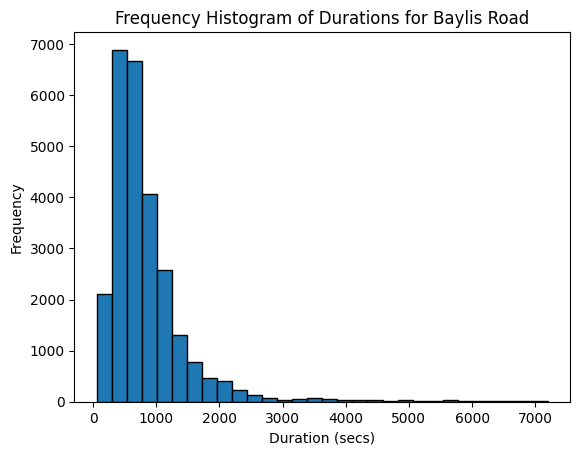

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(A, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Duration (secs)')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Durations for Baylis Road')

# Show plot
plt.show()

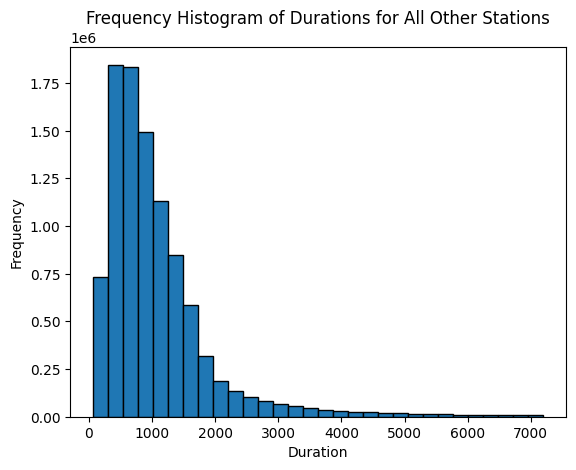

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(B, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Duration (secs)')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Durations for All Other Stations')

# Show plot
plt.show()

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for group A
statistic_A, p_value_A = shapiro(A)
print("Shapiro-Wilk test statistic for group A:", statistic_A)
print("p-value for group A:", p_value_A)

# Perform Shapiro-Wilk test for group B
statistic_B, p_value_B = shapiro(B)
print("Shapiro-Wilk test statistic for group B:", statistic_B)
print("p-value for group B:", p_value_B)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic for group A: 0.6913207769393921
p-value for group A: 0.0
Shapiro-Wilk test statistic for group B: 0.7599567174911499
p-value for group B: 0.0


In [ ]:
#perform a Welch t-test var=false ensures welch's t test is performed instead of the standard independent two sample t test
stats.ttest_ind(B,A, equal_var=False)

TtestResult(statistic=55.944622098088196, pvalue=0.0, df=26400.3030258823)